# Background   : 

### The company recently has changed the web site layout and would like to test whether the new page has made more sales when compare to previous one. The test was conducted by redirecting customer to two pages randomly from Oct 11 to Nov 2, total 23 days.

### There are two excel files, control.csv which has the unchanged page and experience.csv which is a new page. Both files contain

#### Date | PageViews | Click | Enrollments | Payments | Daily Gross Conversion | Dailyy retention | Daily net Conversion

## Metric : Daily gross conversion (DGC) ,Daily retention (DR), Daily net conversion (DNC)


#### Gross conversion: Tnumber of user-ids to complete checkout and enroll in the
free trial divided by number of unique cookies to click the "Start free trial" button.
(dmin= 0.01)
#### Retention: That is, number of user-ids to remain enrolled past the 14-day boundary
(and thusmake at least one payment) divided by number of user-ids to complete checkout.
(dmin=0.01)
#### Net conversion: That is, number of user-ids to remain enrolled past the 14-day boundary
(and thus make at least one payment) divided by the number of unique cookies to
click the "Start free trial" button. (dmin= 0.0075)

## RFC : The Problem 

#### The company would like to check whether the new site has made any improvement on DGC,DR and DNC 

### The method of testing the solution
#### The client has made some change on the page design where place button into more noticeable position 
#### By studying the TTest would help in identifying whether the approach has made difference

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
controldf=pd.read_csv('control.csv',parse_dates=['Date'])
controldf=controldf.dropna()
experimentdf=pd.read_csv('experiment.csv',parse_dates=['Date'])
experimentdf=experimentdf.dropna()

In [3]:
controldf.head(1)

,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion
0,"Sat, Oct 11",7723.0,687.0,134.0,70.0,0.195051,0.522388,0.101892


In [4]:
experimentdf.head(1)

,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion
0,"Sat, Oct 11",7716.0,686.0,105.0,34.0,0.153061,0.32381,0.049563


In [5]:
controldf['control']=1
controldf.head(2)

,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion,control
0,"Sat, Oct 11",7723.0,687.0,134.0,70.0,0.195051,0.522388,0.101892,1
1,"Sun, Oct 12",9102.0,779.0,147.0,70.0,0.188703,0.476190,0.089859,1


In [6]:
experimentdf['control']=0
experimentdf.head()


,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion,control
0,"Sat, Oct 11",7716.0,686.0,105.0,34.0,0.153061,0.323810,0.049563,0
1,"Sun, Oct 12",9288.0,785.0,116.0,91.0,0.147771,0.784483,0.115924,0
2,"Mon, Oct 13",10480.0,884.0,145.0,79.0,0.164027,0.544828,0.089367,0
3,"Tue, Oct 14",9867.0,827.0,138.0,92.0,0.166868,0.666667,0.111245,0
4,"Wed, Oct 15",9793.0,832.0,140.0,94.0,0.168269,0.671429,0.112981,0


### Explore data set

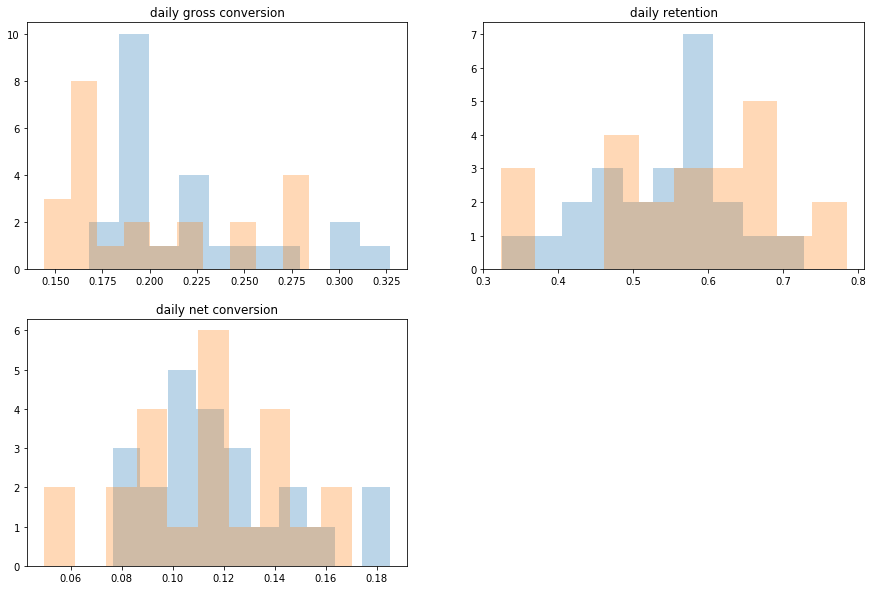

In [7]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.title('daily gross conversion')
plt.hist(controldf['daily gross conversion'],alpha=0.3)
plt.hist(experimentdf['daily gross conversion'],alpha=0.3)

plt.subplot(2,2,2)
plt.title('daily retention')
plt.hist(controldf['daily retention'],alpha=0.3)
plt.hist(experimentdf['daily retention'],alpha=0.3)

plt.subplot(2,2,3)
plt.title('daily net conversion')
plt.hist(controldf['daily net conversion'],alpha=0.3)
plt.hist(experimentdf['daily net conversion'],alpha=0.3)
plt.show()

### Daily retention and daily net are normalised


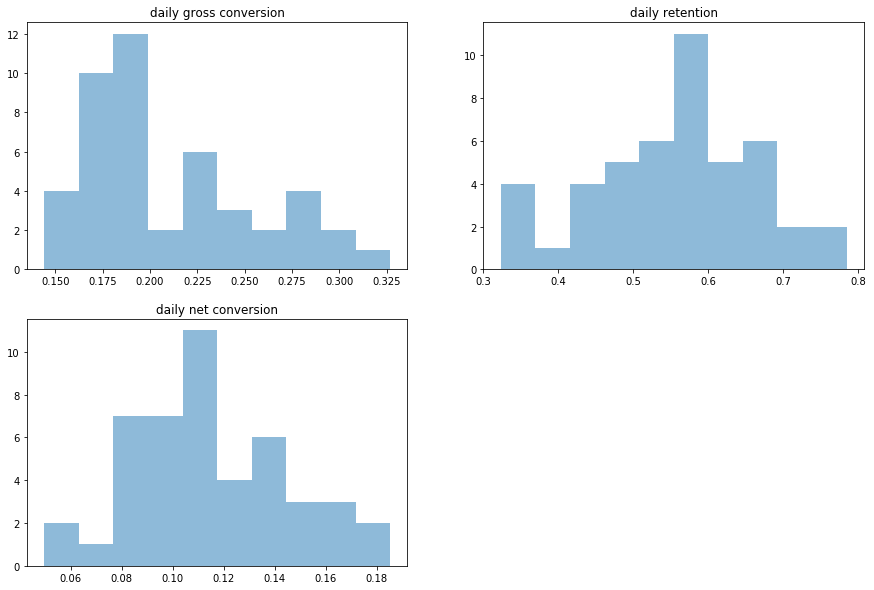

In [8]:
frame=[controldf,experimentdf]
webdf=pd.concat(frame)
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
plt.title('daily gross conversion')
plt.hist(webdf['daily gross conversion'],alpha=0.5)

plt.subplot(2,2,2)
plt.title('daily retention')
plt.hist(webdf['daily retention'],alpha=0.5)

plt.subplot(2,2,3)
plt.title('daily net conversion')
plt.hist(webdf['daily net conversion'],alpha=0.5)
plt.show()


## Hypothesis - The pages view , click , Enrollments, Payyments, daily gross conversion, daily retention and daily net conversion has changed positively for new pages

### Null :: The new pages can't change those variable positively

In [9]:
np.random.seed(1234)
from scipy.stats import ttest_ind

control =controldf.iloc[:,1:]
experiment = experimentdf.iloc[:,1:]

results = ttest_ind(control,experiment)
labels = ['Pages View' , 'Click' , 'Enrollments', 'Payments', 'Daily Gross Conversion','Daily Retention' , 'Daily Net Conversion','']

#print (results.pvalue)


resulthypothese = pd.DataFrame.from_records(results, columns=labels)
resulthypothese.index.name='Control'
resulthypothese = resulthypothese.reset_index()
resulthypothese['ValueName'] = ['statistic','pvalue']
resulthypothese = resulthypothese.set_index('ValueName')

resulthypothese

,Control,Pages View,Click,Enrollments,Payments,Daily Gross Conversion,Daily Retention,Daily Net Conversion,
ValueName,,,,,,,,,
statistic,0,0.142890,0.065982,1.686513,0.592766,1.539675,-1.008141,0.538778,inf
pvalue,1,0.887029,0.947691,0.098776,0.556372,0.130801,0.318899,0.592756,0.000000


### We should not reject the the hypothesis null value,  as pvalue of all columns are low. Meaning that there is no significant to reject the null

### Run one way test

In [10]:
np.random.seed(1234)
from scipy import stats
args = [control,experiment]
#f,p = stats.f_oneway(*args)
result = stats.f_oneway(*args)

resulthypothese = pd.DataFrame.from_records(results, columns=labels)
resulthypothese.index.name='Control'
resulthypothese = resulthypothese.reset_index()
resulthypothese['ValueName'] = ['statistic','pvalue']
resulthypothese = resulthypothese.set_index('ValueName')
resulthypothese

,Control,Pages View,Click,Enrollments,Payments,Daily Gross Conversion,Daily Retention,Daily Net Conversion,
ValueName,,,,,,,,,
statistic,0,0.142890,0.065982,1.686513,0.592766,1.539675,-1.008141,0.538778,inf
pvalue,1,0.887029,0.947691,0.098776,0.556372,0.130801,0.318899,0.592756,0.000000


### Since there is only 2 dataset , so that the one way test result should be same as ttest. So that we can not reject the null also

In [98]:
## Welch’s t-test
np.random.seed(1234)

results = ttest_ind(control,experiment,equal_var=False)
resulthypothese = pd.DataFrame.from_records(results, columns=labels)
resulthypothese.index.name='Control'
resulthypothese = resulthypothese.reset_index()
resulthypothese['ValueName'] = ['statistic','pvalue']
resulthypothese = resulthypothese.set_index('ValueName')
resulthypothese

,Control,Pages View,Click,Enrollments,Payments,Daily Gross Conversion,Daily Retention,Daily Net Conversion,
ValueName,,,,,,,,,
statistic,0,0.142890,0.065982,1.686513,0.592766,1.539675,-1.008141,0.538778,inf
pvalue,1,0.887031,0.947694,0.098851,0.556409,0.130841,0.319372,0.592778,0.000000


## statsmodels.stats.anova.anova_lm
http://www.statsmodels.org/dev/generated/statsmodels.stats.anova.anova_lm.html

### Daily Gross Conversion Regression

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from sklearn import preprocessing

#formula = 'daily gross conversion ~ C(supp) + C(dose) + C(supp):C(dose)'
#formula = "webdf['daily gross conversion'] ~ C(control)+ C(Payments) + C(Click) "

#formula = "webdf['daily gross conversion'] ~ C(control)+ C(Payments)"
formula = "webdf['daily gross conversion'] ~ control+ Payments + Enrollments +Clicks"
model = ols(formula, webdf).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(round(aov_table,4))

#formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
#In a Two-Way ANOVA, there are two variables to consider. The question is whether our variable
#in question (tooth length len) is related to the two other variables supp and dose by the equation:

# 

             sum_sq    df          F  PR(>F)
control      0.0000   1.0     0.2726  0.6044
Payments     0.0000   1.0     0.0393  0.8438
Enrollments  0.0514   1.0  5424.1897  0.0000
Clicks       0.0157   1.0  1654.5379  0.0000
Residual     0.0004  41.0        NaN     NaN


In [ ]:
### daily retention

### Conversion 	Daily Retention

In [20]:
formula = "webdf['daily retention'] ~ control+ Payments + Enrollments +Clicks"
model = ols(formula, webdf).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(round(aov_table,4))

             sum_sq    df         F  PR(>F)
control      0.0003   1.0    0.5529  0.4614
Payments     0.5104   1.0  814.8883  0.0000
Enrollments  0.2927   1.0  467.3347  0.0000
Clicks       0.0002   1.0    0.3151  0.5776
Residual     0.0257  41.0       NaN     NaN


### Daily net conversion

In [21]:
formula = "webdf['daily net conversion'] ~ control+ Payments + Enrollments +Clicks"
model = ols(formula, webdf).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(round(aov_table,4))

             sum_sq    df          F  PR(>F)
control      0.0000   1.0     0.0649  0.8001
Payments     0.0244   1.0  5355.8773  0.0000
Enrollments  0.0000   1.0     0.0201  0.8880
Clicks       0.0050   1.0  1105.9412  0.0000
Residual     0.0002  41.0        NaN     NaN


# Conclusion

## Base on the above test, it can conclude that the new site has no significance to reject the null value, meaning that hte new site has no significance level to state that it has improve the metric - 
## 1)daily gross conversion 	2) daily retention  3) 	daily net conversion

# Notes : 

## One way ANOVA
https://en.wikipedia.org/wiki/One-way_analysis_of_variance

#### Typically, however, the one-way ANOVA is used to test for differences among at least three groups, since the two-group case can be covered by a t-test (Gosset, 1908). When there are only two means to compare, the t-test and the F-test are equivalent; 

the relation between ANOVA and t is given by F = t2. An extension of one-way ANOVA is two-way analysis of variance that examines the influence of two different categorical independent variables on one dependent variable.

The results of a one-way ANOVA can be considered reliable as long as the following assumptions are met:

    Response variable residuals are normally distributed (or approximately normally distributed).
    Variances of populations are equal.
    Responses for a given group are independent and identically distributed normal random variables (not a simple random sample (SRS)).

If data are ordinal, a non-parametric alternative to this test should be used such as Kruskal–Wallis one-way analysis of variance. If the variances are not known to be equal, a generalization of 2-sample Welch's t-test can be used.[2]

## Two way ANOVA
https://en.wikipedia.org/wiki/Two-way_analysis_of_variance

examines the influence of two <B><i>different categorical independent variables</i> </B> 
on <B><i>one continuous dependent variable</i></B>. 
The two-way ANOVA not only aims at assessing the main effect of each independent variable but also if there is any interaction between them.

## Tukey's range test
https://en.wikipedia.org/wiki/Tukey%27s_range_test
 is a single-step multiple comparison procedure and statistical test.
 
 ## TTest Parameter
 https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.ttest_ind.html
 equal_var : bool, optional

    If True (default), perform a standard independent 2 sample test that assumes equal population variances [R704]. If False, perform Welch’s t-test, which does not assume equal population variance